#Stress Detection using Sleeping_Dataset

Team Members:
1.   20MIA1162 – GUNA SHANKAR S
2.   20MIA1106 – MADHUKIRAN P
3.   20MIA1039 – SRIGANTH R
4.   20MIA1031 – SANJAY M
5.   20MIA1117 – PILLARAM MANOJ


**Problem Definition**

The problem faced is that many people don’t know that they are have stress or not. There are many factors that determine whether a person have stress or not. Based on these problems, this study compared the KNN, Naive Bayes, and Decision Tree (DT) algorithms on human physiological data during sleep obtained from the Smart-Yoga Pillow (SaYoPillow) to detect a person's stress level.

**Analytic Approach**

The analytic approach used is predictive analytic using the main KNN method. Because the dataset used is a dataset that is well structured, has features that contain numeric values, and has no noise. Then in a study entitled "Color Harmony Classification using Machine Learning Algorithms: KNN and SVM" which compares the KNN and SVM algorithms where the KNN Algorithm gets an accuracy of 100%. Based on these things, it can be interpreted that the KNN algorithm is good at classifying. Then in this study the KNN algorithm will be compared with the RFG and Logistic algorithms

#Importing Libs

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#ML
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn import metrics
from pandas.core.common import random_state
#ML Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


#Reading Dataset

Introduction: 


*   Stress is a problem in our daily lives. There are numerous tension-producing factors in our daily lives. A person may experience stress in some way because of human settings including the workplace, home, or society
*   More preventive treatment options are being made possible because to the application of health data analytics, particularly predictive analytics. Despite having access to a wealth of data, the healthcare business is unable to anticipate the future using any practical knowledge



In [ ]:
data = pd.read_csv("/content/SaYoPillow.csv")
data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


Dataset Description:

Snoring range: This feature measures the user's snoring range while sleeping. It is most usually measured with a microphone or other comparable equipment.

Respiration rate: This option counts the number of breaths the user takes per minute while sleeping. A respiratory belt or a pulse oximeter can be used to measure it.

Body temperature: This setting measures the user's body temperature when sleeping. It can be measured with a thermistor or a thermal camera, for example.

Limb movement rate: This parameter measures the frequency and extent of the user's limb movements while sleeping. It can be measured with an instrument like an accelerometer.

Blood oxygen levels: This parameter checks the user's blood oxygen saturation when sleeping. A pulse oximeter is often used to measure it.

Eye movement: This characteristic monitors the frequency and amount of the user's eye movements while sleeping. It can be measured with an instrument called an electrooculogram (EOG).

Number of hours slept: This parameter calculates the total amount of time the user slept throughout the measurement period. It might be derived from other measurements or self-reported by the user.

Heart rate: This setting measures the user's heart rate when sleeping. It can be measured with an instrument like an electrocardiogram (ECG).

Stress levels: This parameter assesses the user's perceived stress levels when sleeping and is graded from 0 (low/normal) to 4 (extreme) (high). The user most likely self-reported it.

The dataset appears to be looking into the connections between these numerous characteristics and the user's perceived stress levels while sleeping. It can be used to discover patterns or relationships between various parameters and stress levels, as well as to inform interventions or treatments for increasing sleep quality and stress reduction.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


snoring range of the user, respiration rate, body temperature, limb movement rate, blood oxygen levels, eye movement, number of hours of sleep, heart rate and Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high)

In [ ]:
data.describe()
data.shape

(630, 9)

In [ ]:
#initializing Colums for future use
data.columns = ['snoring_rate', 'respiration_rate', 'body_temperature', 
'limb_movement', 'blood_oxygen','eye_movement', 'sleeping_hours', 'heart_rate',
 'stress_level']

# Finding Null
data.isnull().sum()


snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

# Exploring Data in visual graphs

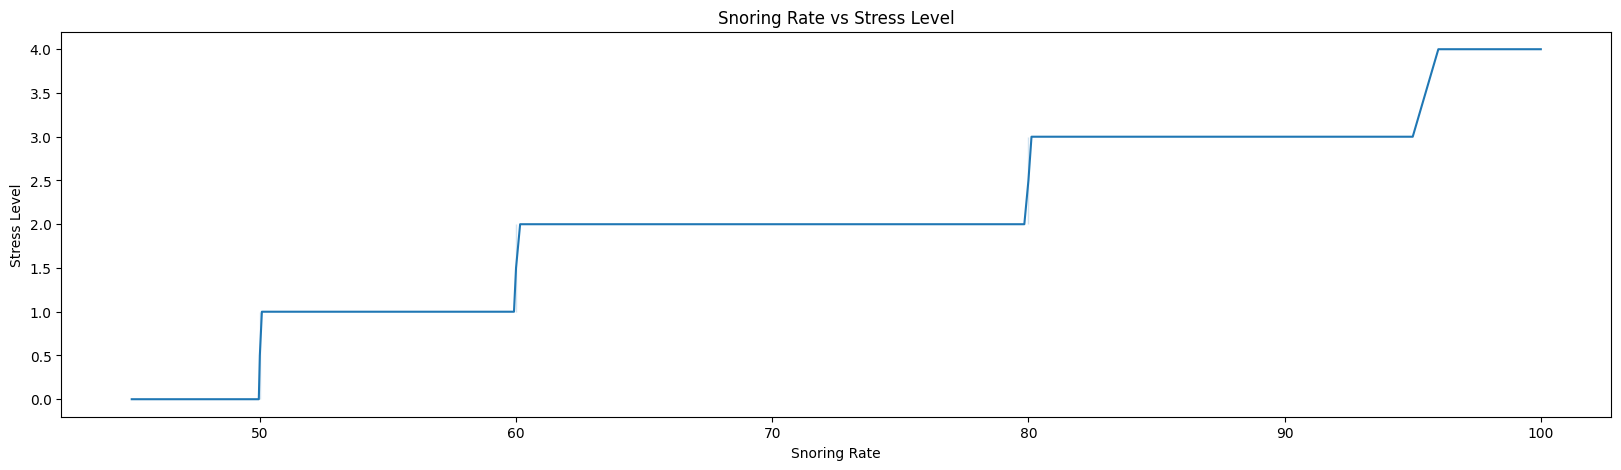

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x='snoring_rate',y='stress_level',data=data)
plt.xlabel("Snoring Rate")
plt.ylabel('Stress Level')
plt.title('Snoring Rate vs Stress Level')
plt.xticks(rotation=0)
plt.show()

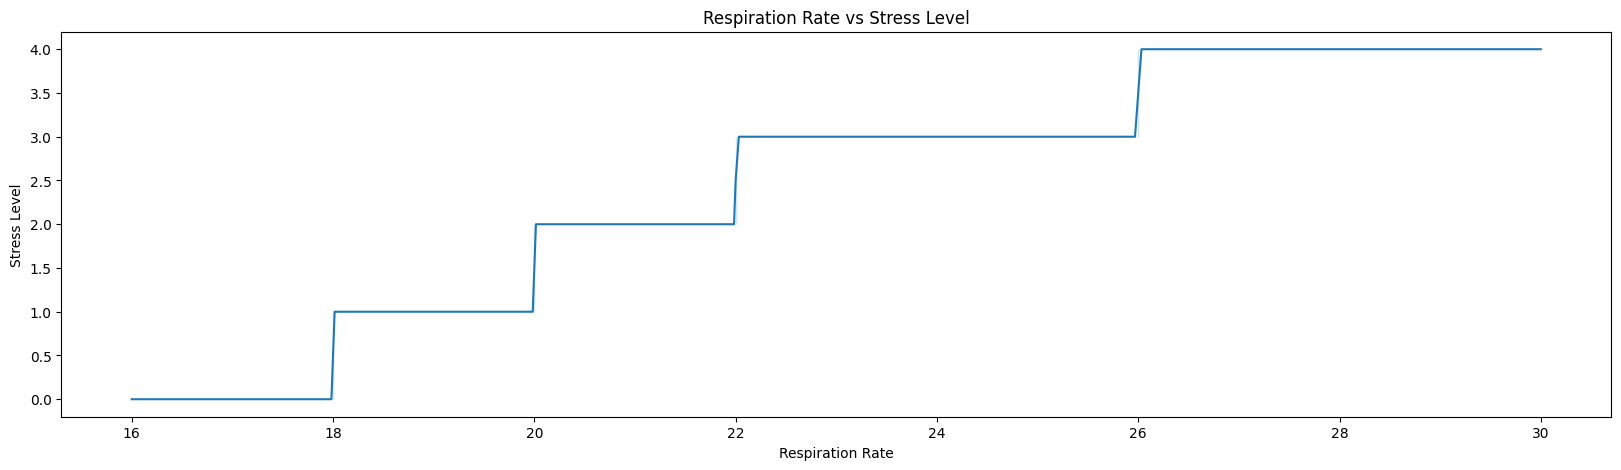

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x='respiration_rate',y='stress_level',data=data)
plt.xlabel("Respiration Rate")
plt.ylabel('Stress Level')
plt.title('Respiration Rate vs Stress Level')
plt.xticks(rotation=0)
plt.show()

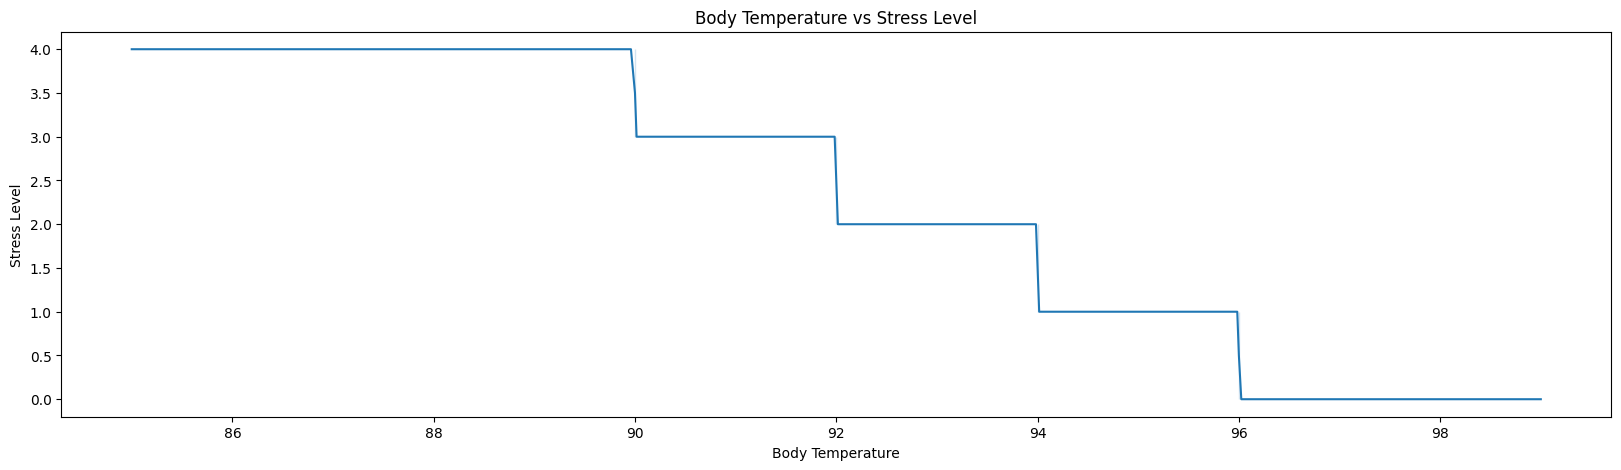

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x='body_temperature',y='stress_level',data=data)
plt.xlabel("Body Temperature")
plt.ylabel('Stress Level')
plt.title('Body Temperature vs Stress Level')
plt.xticks(rotation=0)
plt.show()

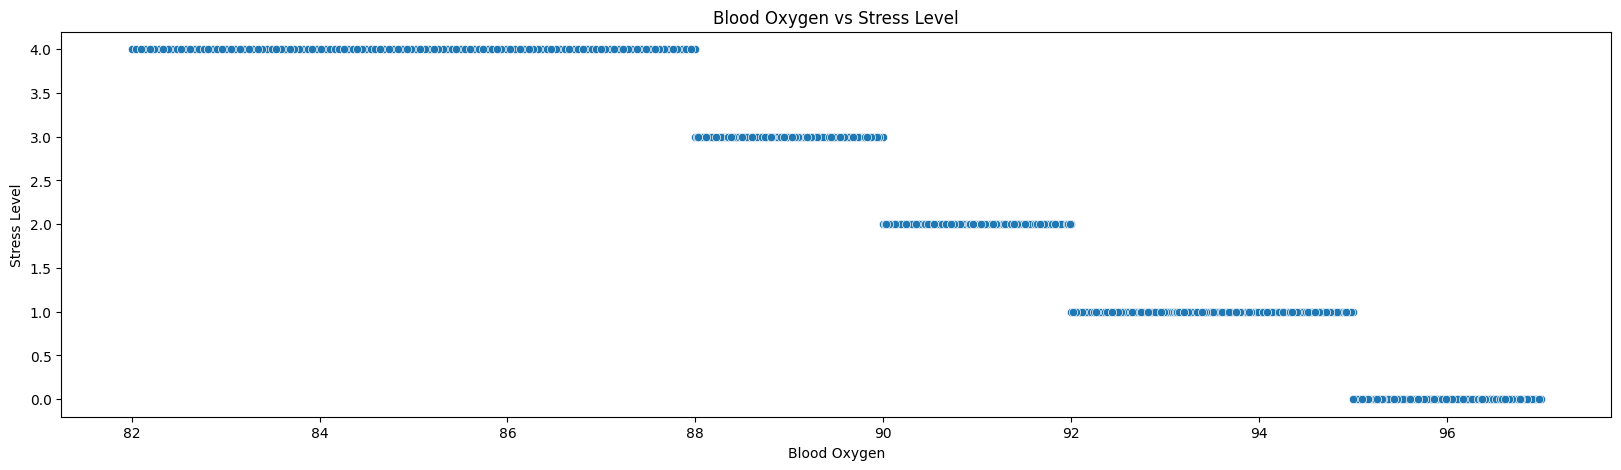

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='blood_oxygen',y='stress_level',data=data)
plt.xlabel("Blood Oxygen")
plt.ylabel('Stress Level')
plt.title('Blood Oxygen vs Stress Level')
plt.xticks(rotation=0)
plt.show()

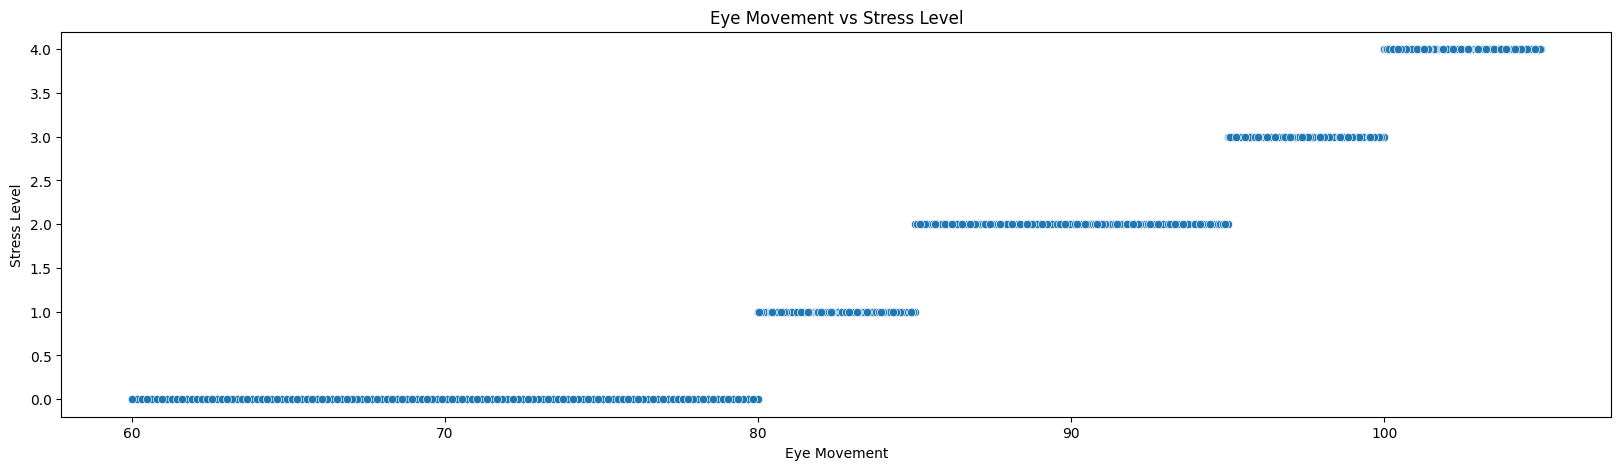

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='eye_movement',y='stress_level',data=data)
plt.xlabel("Eye Movement")
plt.ylabel('Stress Level')
plt.title('Eye Movement vs Stress Level')
plt.xticks(rotation=0)
plt.show()

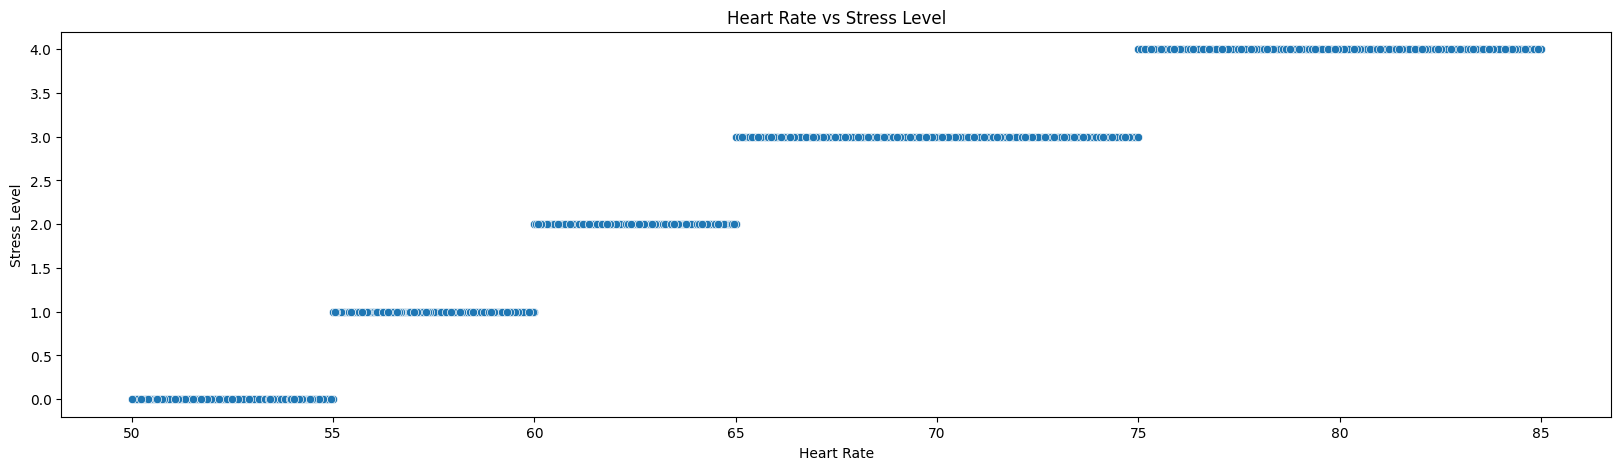

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='heart_rate',y='stress_level',data=data)
plt.xlabel("Heart Rate")
plt.ylabel('Stress Level')
plt.title('Heart Rate vs Stress Level')
plt.xticks(rotation=0)
plt.show()

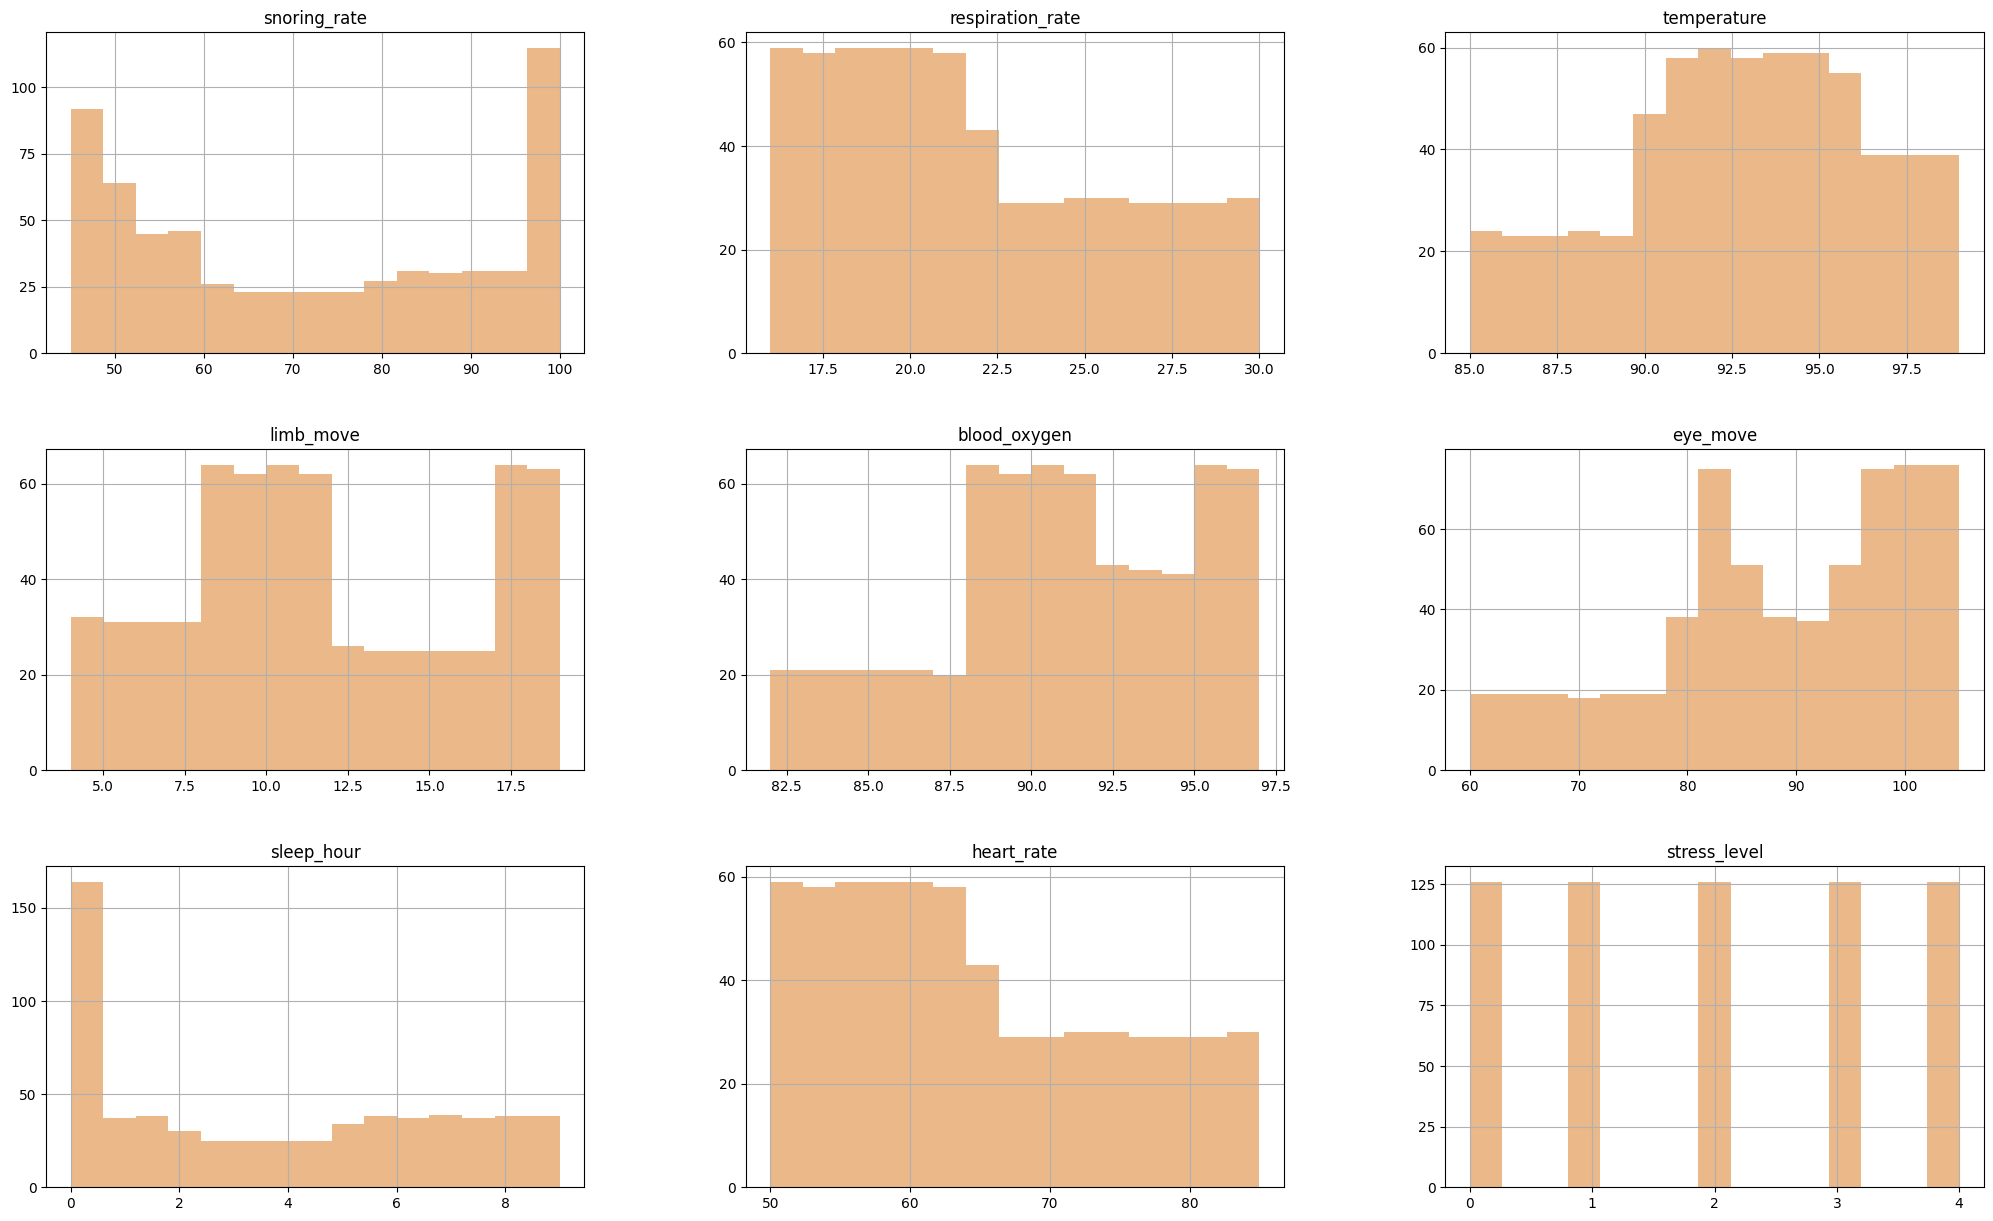

In [ ]:
data.columns = ['snoring_rate', 'respiration_rate', 'temperature', 'limb_move', 'blood_oxygen', 'eye_move', 'sleep_hour', 'heart_rate', 'stress_level']
color = '#eab889'
data = data.copy()

data.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

Check the distribution of data from each column. It can be stated that the distribution of data from the features snoring_rate, respiration_rate, eye_move, sleep_hour, and heart_rate has an abnormal distribution. The distribution of data from the temperature, limb_move, and blood_oxygen features has a normal distribution.

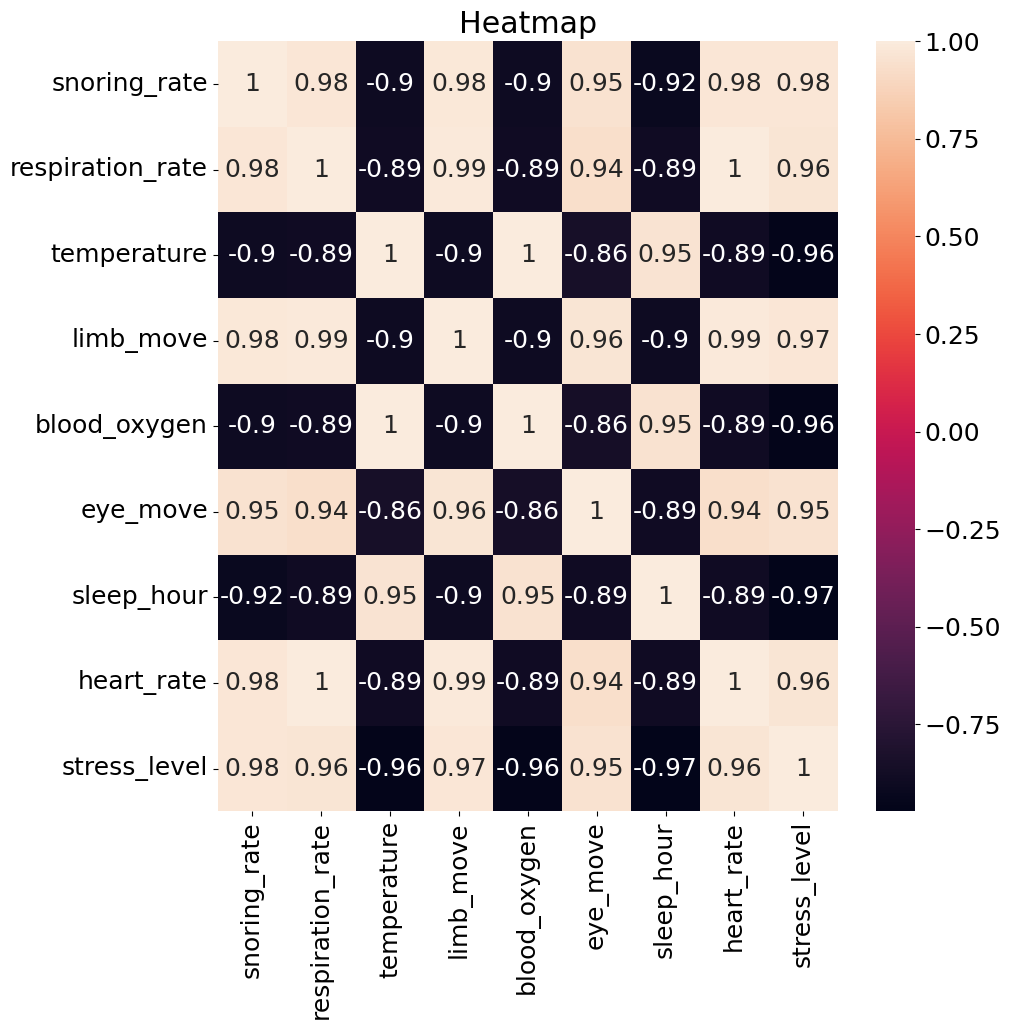

In [ ]:
plt.figure(figsize=(10,10))
tc = data.corr()
sns.heatmap(tc,annot=True)
plt.title('Heatmap')
plt.show()

Check the correlation between features. it can be seen that all features have a very strong correlation, where if the correlation value is equal to 1, then the correlation is positive. If the correlation value is equal to -1, then the correlation is negative.



#Outlier Detection

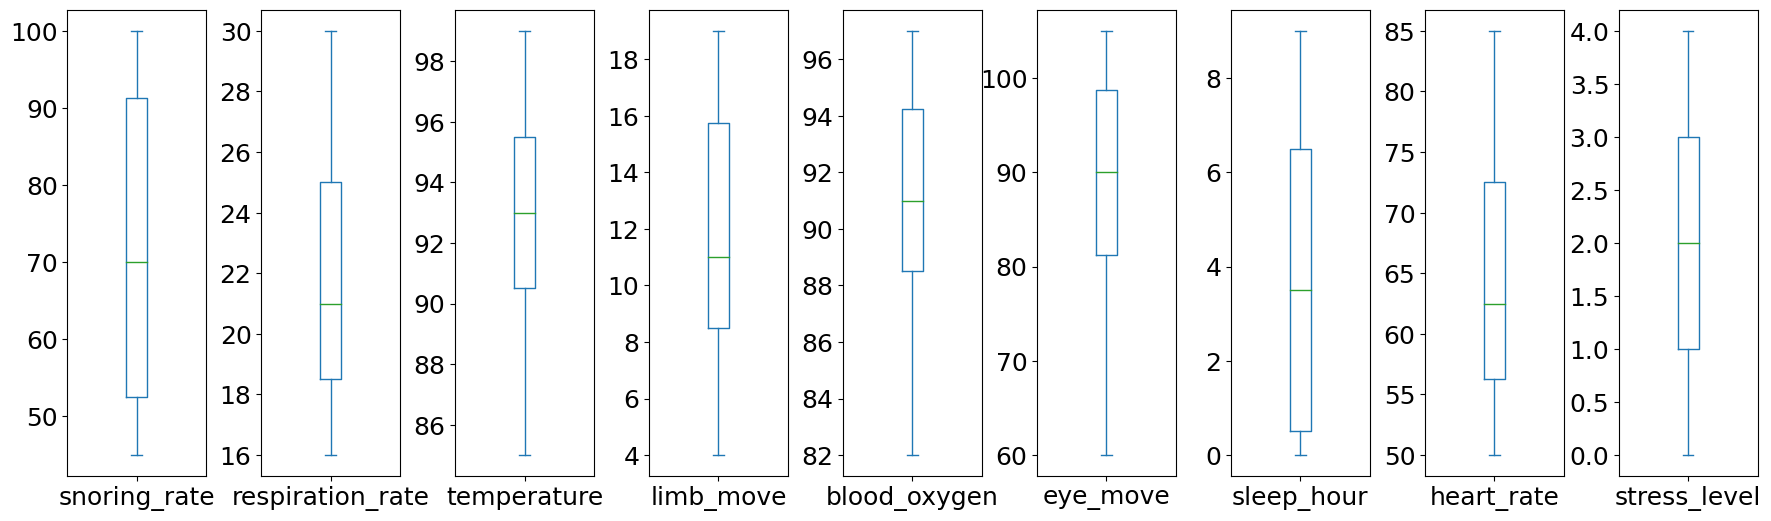

In [ ]:
data.plot(kind='box', subplots=True, layout=(2,14),figsize=(14,14), sharex=False, sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Check whether there are outlier data in each column in the data. It can be seen that there are no outliers in the data.

In [ ]:
x = data.copy();
x.drop('stress_level', axis = 1, inplace = True)
y = data['stress_level']

Separating the output or target from the data, then the features of the data are entered in the x variable and the output/target of the data is entered in the y variable.

In [ ]:
#Normalize data features using minmax.
x = minmax_scale(x)
#Separating training data and testing data with a ratio of 80%:20%.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2,random_state =123)
data_preprocessed = pd.DataFrame(x, columns = ['snoring_rate', 'respiration_rate', 'temperature', 'limb_move', 'blood_oxygen', 'eye_move', 'sleep_hour', 'heart_rate'])
data_preprocessed['stress_level'] = y
data_preprocessed.head()

,snoring_rate,respiration_rate,temperature,limb_move,blood_oxygen,eye_move,sleep_hour,heart_rate,stress_level
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0


#Model

In [ ]:
k = [5,10,15]
max_depth = [20, 40, 60]
for i in range(3):
    models = []
    models.append(('KNN', KNeighborsClassifier(n_neighbors=k[i])))
    models.append(('NB', GaussianNB()))
    models.append(('DT', DecisionTreeClassifier(max_depth=max_depth[i], random_state=101)))
    results = []
    names = []
    print("K:",k[i], "and max_depth:", max_depth[i])
    for name, model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print("")

K: 5 and max_depth: 20
KNN: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
DT: 0.980198 (0.014002)

K: 10 and max_depth: 40
KNN: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
DT: 0.980198 (0.014002)

K: 15 and max_depth: 60
KNN: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
DT: 0.980198 (0.014002)



Hyperparameter search for KNN and DT models. In KNN testing of the hyperparameter values of K 5, 10, and 15 produced the same accuracy values. Therefore the chosen value of K is 5.

In DT, the hyperparameter test with max_depth values of 20, 40, and 60 produces the same accuracy value. Therefore, the max_depth value is chosen to be 40.

In [ ]:
from sklearn.metrics import accuracy_score

# Create K-NN Model
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
predict_KNN = model_KNN.predict(X_test)
# Create NB Model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
predict_NB = model_NB.predict(X_test)
# Create DT Model
model_DT = DecisionTreeClassifier(max_depth=40,random_state=101)
model_DT.fit(X_train, y_train)
predict_DT = model_DT.predict(X_test)


#Model Evaluation 

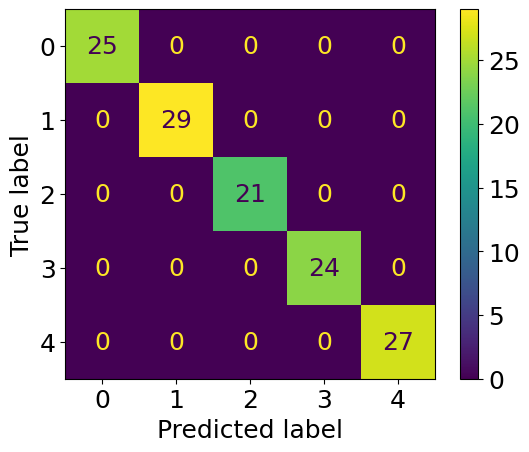

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        27

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



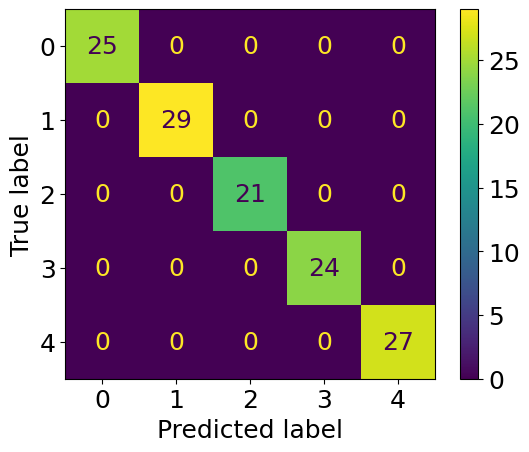

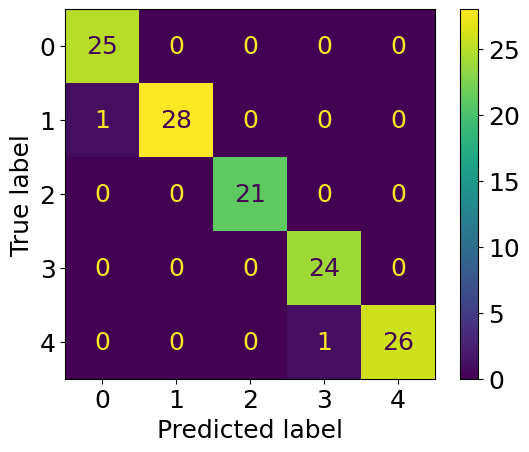

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        21
           3       0.96      1.00      0.98        24
           4       1.00      0.96      0.98        27

    accuracy                           0.98       126
   macro avg       0.98      0.99      0.98       126
weighted avg       0.98      0.98      0.98       126



In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predict_KNN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])
cm_display.plot()
plt.show()

print(classification_report(y_test, predict_KNN))

#NB
confusion_matrix = metrics.confusion_matrix(y_test, predict_NB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])

cm_display.plot()
plt.show()
y_t = y_test
#DT
confusion_matrix = metrics.confusion_matrix(y_test, predict_DT)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])
cm_display.plot()
plt.show()

print(classification_report(y_test, predict_DT))

For all the models that have been made it is very good because it gets high accuracy. Where the K-NN and Naive Bayes models get an accuracy of 100%, while the Decision Tree model gets an accuracy of 98%. To improve the model that has been made, when searching for hyperparameters for the range, multiply it again so that you get the optimal hyperparameter.

#Feature Scaling
The data we have are not on same scale. So bringing them on the same scale.

In [ ]:
data = pd.read_csv('/content/SaYoPillow.csv')
data.rename(columns = {'sr':'snoring rate', 'rr':'respiration rate',
                        't':'body temperature', 'lm':'limb movement', 
                        'bo':'blood oxygen', 'rem':'eye movement', 
                        'sr.1':'sleeping hours','hr':'heart rate', 
                        'sl':'stress level'}, inplace = True)
data.head()
#Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high)

from sklearn.preprocessing import MinMaxScaler
#Defining varible
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data[['snoring rate', 'respiration rate',
'body temperature', 'limb movement','blood oxygen', 'eye movement', 
'sleeping hours','heart rate']])
print(scaled)
newdf = pd.DataFrame(scaled, columns =['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate'])
newdf.head()
newdf['stress level']=data['stress level']

[[0.88727273 0.69142857 0.48857143 ... 0.88       0.20444444 0.69142857]
 [0.848      0.65028571 0.468      ... 0.864      0.17244444 0.65028571]
 [0.27272727 0.28571429 0.78571429 ... 0.55555556 0.77777778 0.28571429]
 ...
 [0.95461818 0.82171429 0.13428571 ... 0.93066667 0.         0.82171429]
 [0.248      0.26628571 0.76628571 ... 0.54044444 0.74755556 0.26628571]
 [0.52581818 0.38514286 0.59942857 ... 0.71022222 0.45422222 0.38514286]]


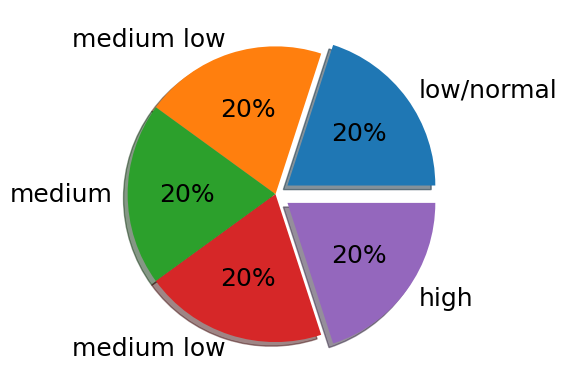

Dimensions of train dataset: (378, 8)
Dimensions of test dataset: (252, 8)
accuracy_score: 1.0
cross val score: 1.0


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


accuracy_score 0.9801587301587301
accuracy_score 0.9801587301587301


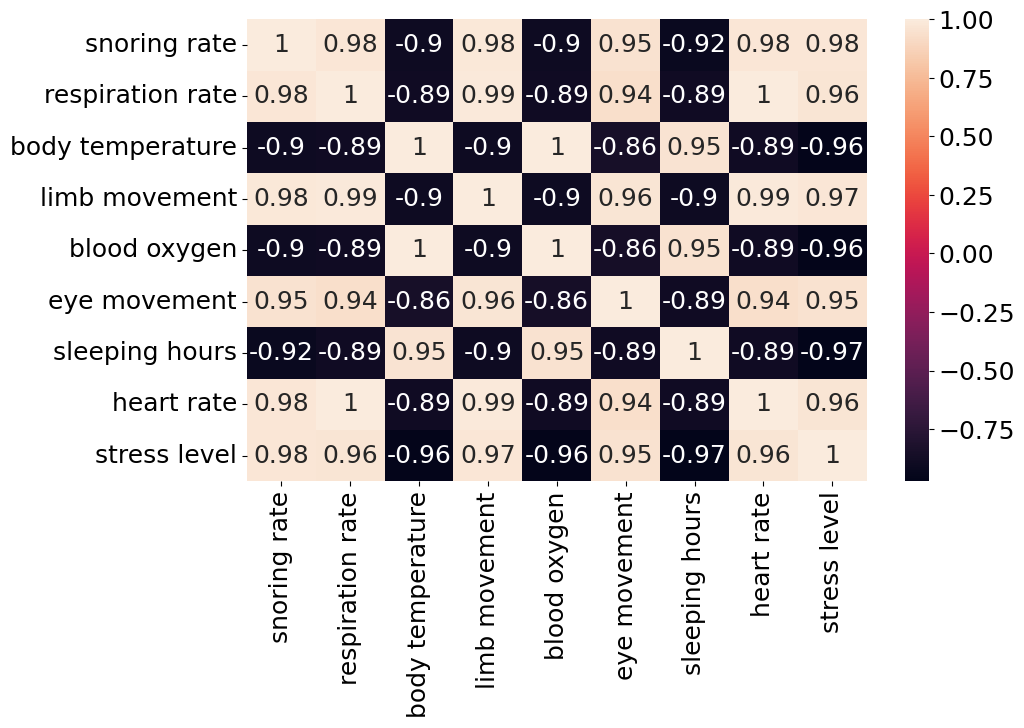

In [ ]:
newdf
newdf.describe()
newdf['stress level'].value_counts().sort_values()

#plotting a pie chart to show the distribution of data
label = ['low/normal' , 'medium low' , 'medium' ,'medium low','high']
ex=[0.1,0,0,0,0.1]
plt.pie(newdf['stress level'].value_counts(),labels=label,autopct='%.0f%%',explode=ex,shadow=True)
plt.show()
newdf.corrwith(newdf['stress level'], method = 'pearson')
plt.figure(figsize=(10,6))
sns.heatmap(newdf.corr(),annot=True)

#splitting among features and target
from sklearn.model_selection import train_test_split as tts
X = newdf[['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate']]
y = newdf['stress level']
#splitting among test and train dataset
x_train, x_test, y_train, y_test= tts(X, y, test_size=0.4)
print('Dimensions of train dataset:',x_train.shape)
print('Dimensions of test dataset:',x_test.shape)

#defining dictionaries for storing results of different models and comparing 
sc = {}
rn = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score as cvs
lrr=LogisticRegression()
lrr.fit(x_train,y_train)
lrr_pred=lrr.predict(x_test)
print('accuracy_score:',metrics.accuracy_score(y_test, lrr_pred))

r=cvs(lrr, X, y, cv=10, scoring='accuracy').mean()
sc['Logistic Regression']=r
rn['Logistic Regression']=np.array(np.unique(lrr_pred, return_counts=True))
print('cross val score:',r)

#XGB Classifier
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train,eval_metric='auc')
xgb_pred=XGB.predict(x_test)
print("accuracy_score",metrics.accuracy_score(y_test, xgb_pred))
sc['XGB Classifier']=metrics.accuracy_score(y_test, xgb_pred)
rn['XGB Classifier']=np.array(np.unique(xgb_pred, return_counts=True))

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators = 50)
rfm.fit(x_train,y_train)
rfm_pred=rfm.predict(x_test)
print("accuracy_score",metrics.accuracy_score(y_test, rfm_pred))
sc['Random Forest']=metrics.accuracy_score(y_test, rfm_pred)
rn['Random Forest']=np.array(np.unique(rfm_pred, return_counts=True))

In [ ]:
sc
rn

{'Logistic Regression': array([[ 0,  1,  2,  3,  4],
        [49, 57, 44, 58, 44]]),
 'XGB Classifier': array([[ 0,  1,  2,  3,  4],
        [52, 54, 46, 56, 44]]),
 'Random Forest': array([[ 0,  1,  2,  3,  4],
        [52, 54, 46, 56, 44]])}

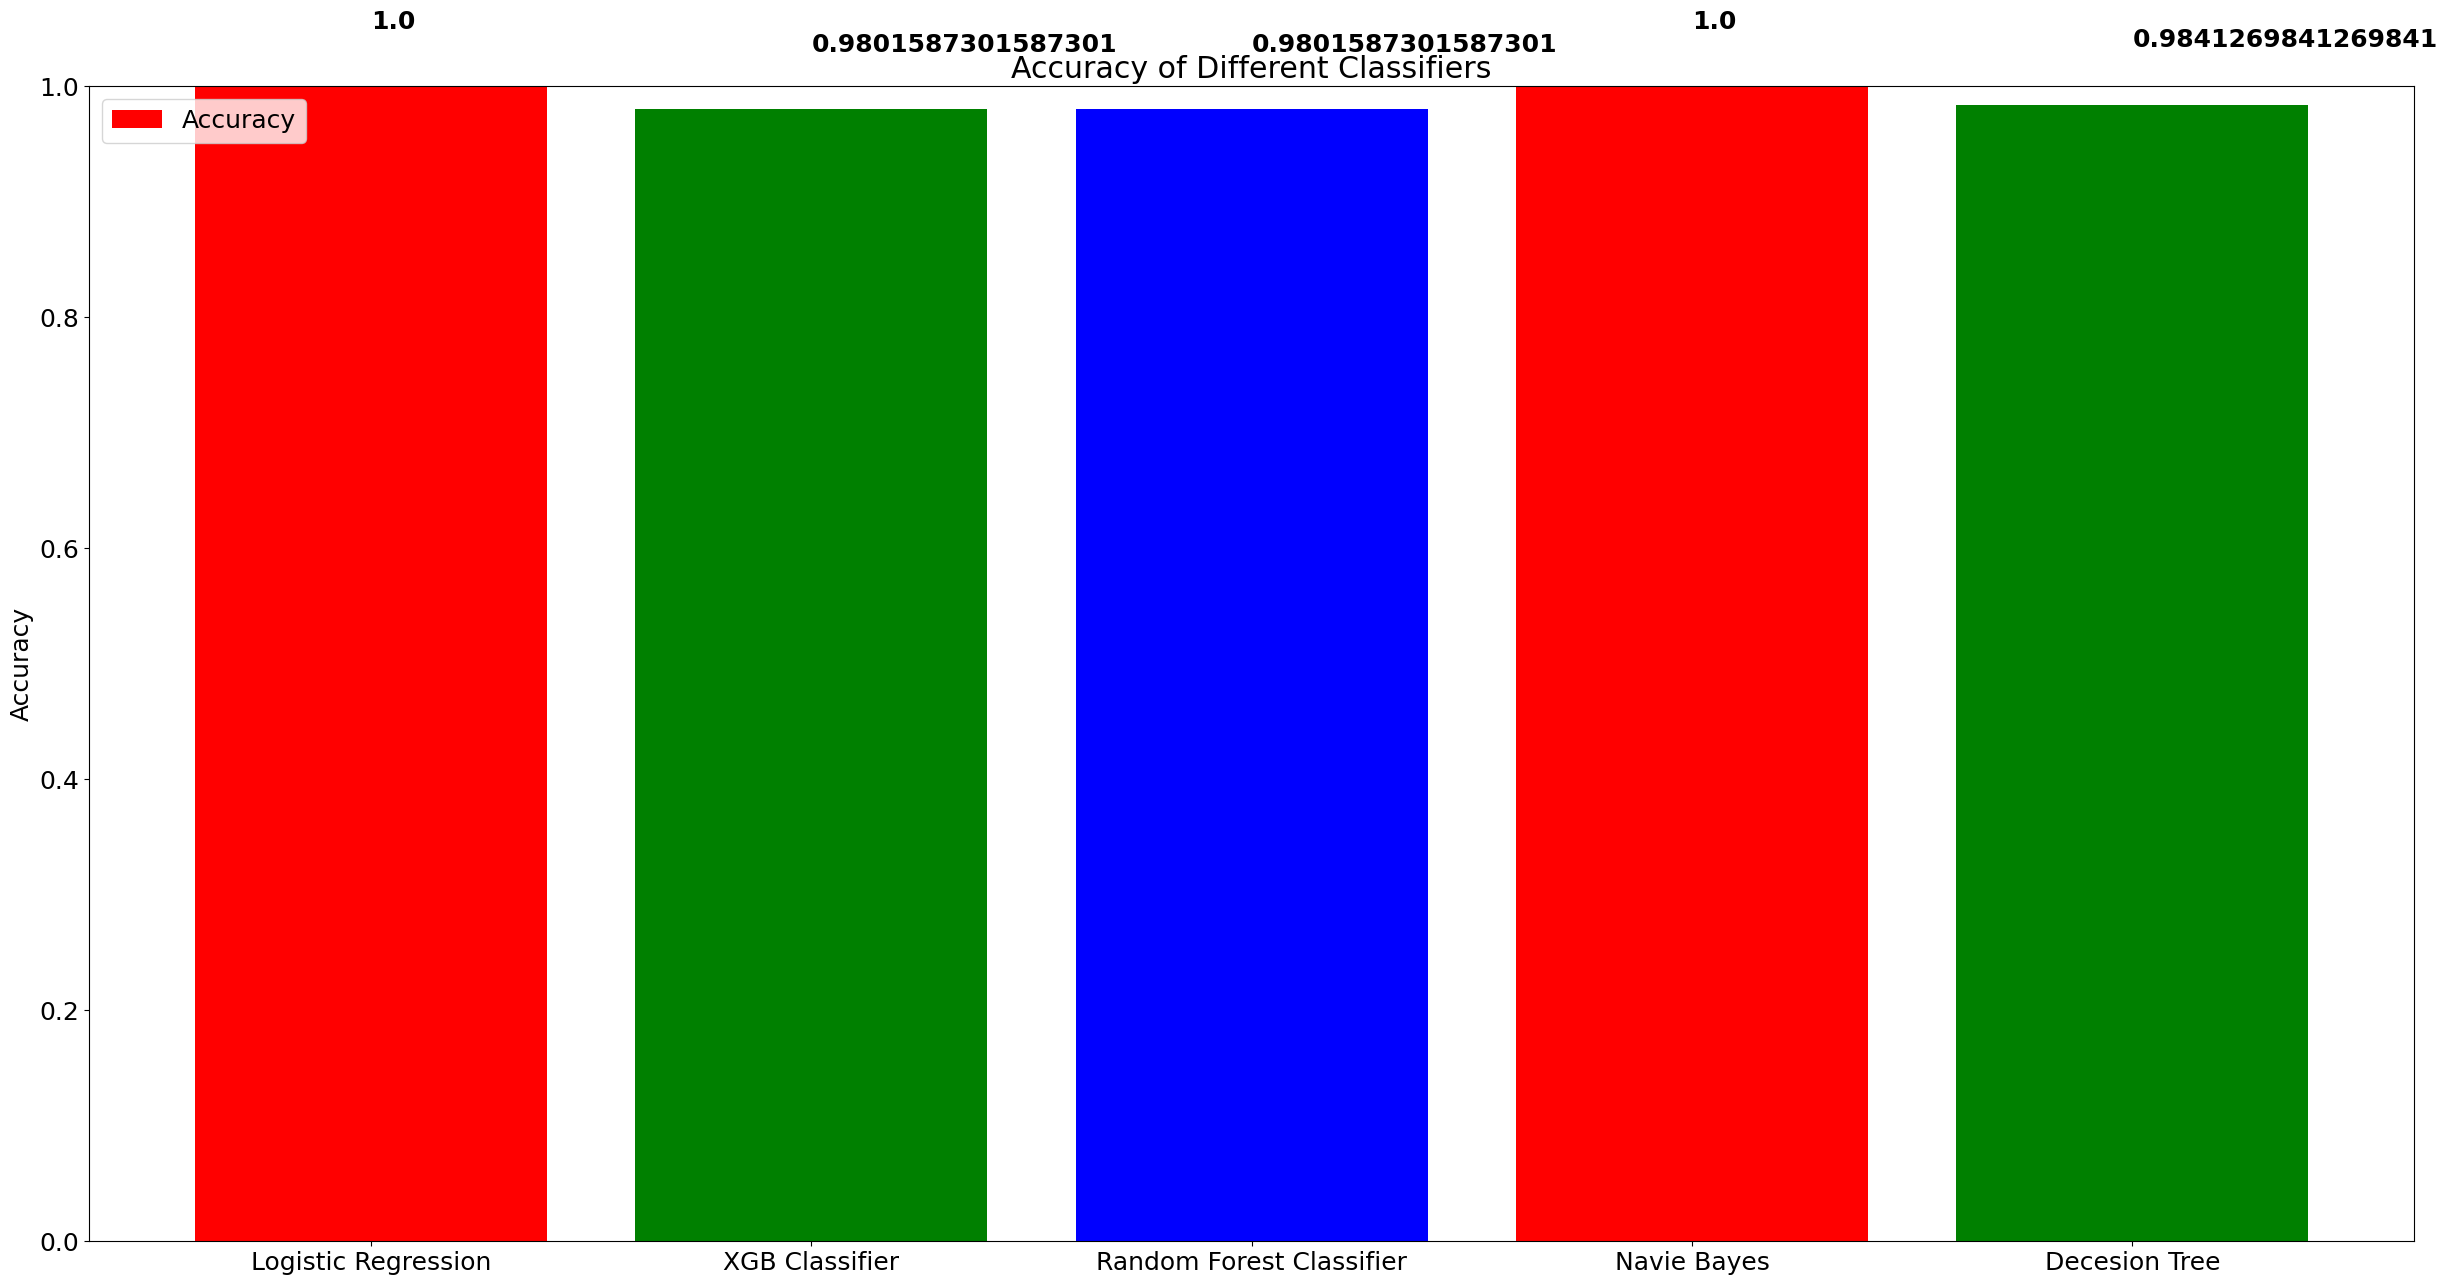

In [ ]:
import matplotlib.pyplot as plt

classifiers = ['Logistic Regression', 'XGB Classifier', 
               'Random Forest Classifier', 'Navie Bayes', 
               'Decesion Tree']
accuracies = [metrics.accuracy_score(y_test, lrr_pred),
              metrics.accuracy_score(y_test, xgb_pred) ,
              metrics.accuracy_score(y_test, rfm_pred),
              accuracy_score(y_t, predict_NB), 
              accuracy_score(y_t, predict_DT)]

# plt.bar(classifiers, accuracies, color = 'blue')
# plt.xlabel('Classifiers')
# plt.ylabel('Accuracies')
# plt.title('Accuracy of Classifiers')
# plt.legend(loc='upper left')
# plt.show()

fig, ax = plt.subplots(figsize=(30, 15))

x_pos = np.arange(len(classifiers))

ax.bar(x_pos, accuracies, align='center', color=['red', 'green', 'blue'])
ax.set_xticks(x_pos)
ax.set_xticklabels(classifiers)
ax.set_ylim(0, 1)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Classifiers')

for i, v in enumerate(accuracies):
    ax.text(i, v + 0.05, str(v), color='black', fontweight='bold')

ax.legend(['Accuracy'], loc='upper left')
plt.show()

The goal of logistic regression is to forecast stress levels using physiological cues including heart rate, respiration rate, blood oxygen level, body temperature, and eye movements. A binary logistic regression is used to predict whether a person is under or over stress. The model is trained using physiological signal data and stress level ratings, and its performance is measured using measures such as precision, recall, and F1 score. The logistic function is used to convert the linear relationship between the independent and dependent variables into a sigmoidal curve that predicts the likelihood of the result.The accuracy for logistic regression algorithm is 100%.

The XGB classifier is a binary classification implementation of the XGBoost algorithm. To reduce overfitting and increase generalisation performance, it employs an ensemble of decision trees and regularisation algorithms. The XGB classifier is trained on a dataset that combines physiological signal data and stress level evaluations and is used to predict whether a person is likely to be in the high-stress category. The model's performance is measured using measures like as accuracy, precision, recall, and F1 score.The accuracy for XGB classifier algorithm is  98%.

Random Forest Classifier is a binary classification implementation of the Random Forest technique. To reduce overfitting and increase generalisation performance, it employs an ensemble of decision trees and random sampling. The Random Forest Classifier predicts the chance of a person being in the high-stress group based on a dataset that contains physiological signal data and stress level evaluations. Metrics including as accuracy, precision, recall, and F1 score are used to assess the model's performance. The process of finding the best collection of hyperparameters for the model is known as hyperparameter tuning.The accuracy for Random forest classifier regression algorithm is 98%.

The Naive Bayes classifier is a binary classification implementation of the Naive Bayes algorithm. Given the class variable, it assumes that the features are independent of one another and computes the posterior probability of each class given the observed features. The Naive Bayes classifier predicts the chance of an individual being in the high-stress group based on a dataset that contains physiological signal data and stress level evaluations. Metrics including as accuracy, precision, recall, and F1 score are used to assess the model's performance.The accuracy for Navie bayes algorithm is 100%.

Decision Tree algorithm is a machine learning strategy for categorization analysis. It builds a decision tree based on the values of input variables and predicts the value of a target variable using this model. The algorithm is trained on a dataset combining physiological signal data and stress level assessments and is used to predict whether or not a person would fall into the high-stress group. Metrics including as accuracy, precision, recall, and F1 score are used to assess the model's performance.The accuracy for Decision tree regression algorithm is 98.4%.

In [ ]:
pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 14.1 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb
from catboost import CatBoostRegressor

# LightGBM model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

# CatBoost model
cat_model = CatBoostRegressor()
cat_model.fit(X_train, y_train)


Learning rate set to 0.036742
0:	learn: 1.3731752	total: 53.4ms	remaining: 53.3s
1:	learn: 1.3282626	total: 56.2ms	remaining: 28.1s
2:	learn: 1.2828848	total: 60ms	remaining: 19.9s
3:	learn: 1.2397328	total: 63.9ms	remaining: 15.9s
4:	learn: 1.1991021	total: 67.8ms	remaining: 13.5s
5:	learn: 1.1582603	total: 73.7ms	remaining: 12.2s
6:	learn: 1.1190039	total: 75.8ms	remaining: 10.8s
7:	learn: 1.0814311	total: 81.6ms	remaining: 10.1s
8:	learn: 1.0467927	total: 85.8ms	remaining: 9.45s
9:	learn: 1.0128855	total: 89.7ms	remaining: 8.88s
10:	learn: 0.9805532	total: 93.6ms	remaining: 8.42s
11:	learn: 0.9477013	total: 97.7ms	remaining: 8.04s
12:	learn: 0.9157054	total: 102ms	remaining: 7.73s
13:	learn: 0.8854669	total: 106ms	remaining: 7.45s
14:	learn: 0.8545812	total: 110ms	remaining: 7.23s
15:	learn: 0.8245927	total: 115ms	remaining: 7.05s
16:	learn: 0.7970579	total: 119ms	remaining: 6.87s
17:	learn: 0.7693429	total: 126ms	remaining: 6.85s
18:	learn: 0.7432553	total: 129ms	remaining: 6.68s
1

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# LightGBM model evaluation
y_pred = lgb_model.predict(X_test)
lgb_mse = mean_squared_error(y_test, y_pred)
lgb_rmse = np.sqrt(lgb_mse)
lgb_r2 = r2_score(y_test, y_pred)

# CatBoost model evaluation
y_pred = cat_model.predict(X_test)
cat_mse = mean_squared_error(y_test, y_pred)
cat_rmse = np.sqrt(cat_mse)
cat_r2 = r2_score(y_test, y_pred)

print("LightGBM: RMSE = {:.2f}, R2 = {:.2f}".format(lgb_rmse, lgb_r2))
print("CatBoost: RMSE = {:.2f}, R2 = {:.2f}".format(cat_rmse, cat_r2))


LightGBM: RMSE = 0.09, R2 = 1.00
CatBoost: RMSE = 0.01, R2 = 1.00


In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

# Evaluate the model on the testing set
score = gb_model.score(X_test_scaled, y_test)
print("R-squared score:", score)

R-squared score: 0.9965809671276443


In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale the features using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train_scaled, y_train)

# Predict the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0


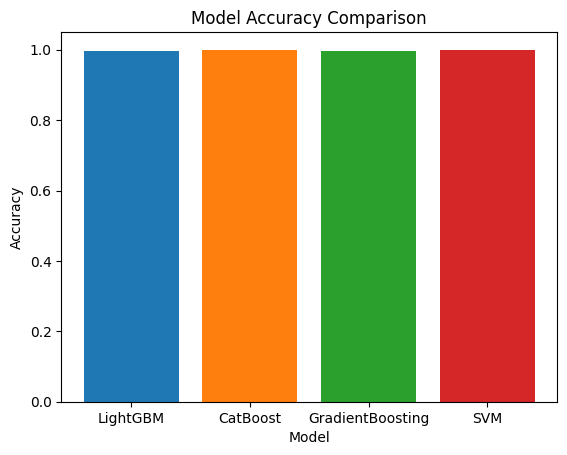

In [ ]:
import matplotlib.pyplot as plt

# Define model names and accuracy scores
models = ['LightGBM', 'CatBoost', 'GradientBoosting', 'SVM']
accuracies = [lgb_r2, cat_r2, score, acc]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


# Create bar plot
fig, ax = plt.subplots()
ax.bar(models, accuracies,color=colors)

# Set axis labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')

# Show plot
plt.show()



LightGBM is a framework for gradient boosting that use tree-based learning techniques. 
It is intended to be widely dispersed and efficient, with the following benefits:
•Faster training speed and higher efficiency.
•Lower memory usage.
•Better accuracy.
•Support of parallel, distributed, and GPU learning.
•Capable of handling large-scale data.
Gradient-based One-Side Sampling (GOSS), a cutting-edge method used by LightGBM, is used to filter out the data instances and get the split value,while XGBoost computes the optimal split using a pre-sorted method and a Histogram-based approach.The accuracy for LightGBM algorithm is 100%.

CatBoost (Categorical Boosting) is a machine learning technique that is specifically developed to operate with categorical information and solve some of the limitations of classic gradient boosting methods. CatBoost can handle both numerical and categorical data and recognises which features are categorical automatically. It employs a gradient boosting variation called gradient-based one-side sampling (GOSS), which lowers the amount of data that must be processed during training. As a result, it is faster and uses less memory than classic gradient boosting approaches.
CatBoost can handle category features automatically, without the requirement for one-hot encoding, by converting them into numerical representations.
CatBoost is able to determine the value of a feature based on how well it performs when combined with other features. CatBoost may be used with GPUs, greatly reducing the amount of time needed to train huge datasets.The accuracy for CatBoost algorithm is 100%.


The Gradient Boosting Regressor (GBR), a machine learning technique, is a member of the ensemble boosting method family. In an iterative process, it turns a number of poor learners into a single strong learner. The algorithm creates a new model during each iteration in an effort to fix the mistakes caused by the prior models.It can handle both linear and nonlinear correlations between the data and the target variable, GBR is an effective technique for regression tasks. Additionally, it can deal with data anomalies and missing values. Gradient descent, which minimises the loss function by shifting the model's parameters in the direction of the negative gradient, is the foundation of GBR.The number of trees in the ensemble, the learning rate, and the maximum depth of the trees serve as the three primary hyperparameters of GBR. The model's complexity is governed by the number of trees, and the gradient descent's step size is governed by the learning rate. The extent of interaction between the features is governed by the trees' maximum depth. The GBR algorithm, which is effective, can do regression jobs with a high degree of accuracy.The accuracy for Gradient Boosting Regressor algorithm is 99.65%.

The Support Vector Machine (SVM) is a well-known machine learning technique for classification and regression analysis. It is a supervised learning algorithm that analyses data and recognises patterns before categorising or grouping fresh data points. SVM works by locating a hyperplane in a high-dimensional space that divides the various classes. The hyperplane is chosen so that the margin between the closest points of the different classes is maximised. 
The distance between the hyperplane and the nearest data points in each class is represented by this margin. Support vectors are the spots nearest to the hyperplane. SVM also has the ability to handle high-dimensional data with a minimal number of samples. As it concentrates on the data points that are closest to the decision border and disregards the remaining data points, SVM performs well on datasets with many features but fewer samples.SVM has several uses in a variety of industries, including banking, bioinformatics, image classification, and text classification. It is an effective machine learning tool due to its excellent accuracy and capacity for handling complex data.The accuracy for SVM algorithm is 100%.

In [ ]:
import pandas as pd
import numpy as np
import keras
import keras.utils
from keras import utils as np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/SaYoPillow.csv')

# Split the dataset into features and target variable
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create a neural network model
model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(8,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test MAE:', test_mae)


Epoch 1/100
16/16 [==============================] - 2s 24ms/step - loss: 6.0395 - mae: 2.0290 - val_loss: 5.6941 - val_mae: 1.9903
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 5.2620 - mae: 1.8862 - val_loss: 4.9967 - val_mae: 1.8658
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 4.5870 - mae: 1.7605 - val_loss: 4.3111 - val_mae: 1.7312
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 3.9009 - mae: 1.6156 - val_loss: 3.5546 - val_mae: 1.5663
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 3.0841 - mae: 1.4350 - val_loss: 2.6844 - val_mae: 1.3609
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 2.2577 - mae: 1.2210 - val_loss: 1.8804 - val_mae: 1.1309
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 1.5176 - mae: 0.9969 - val_loss: 1.2170 - val_mae: 0.9134
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9354 - 

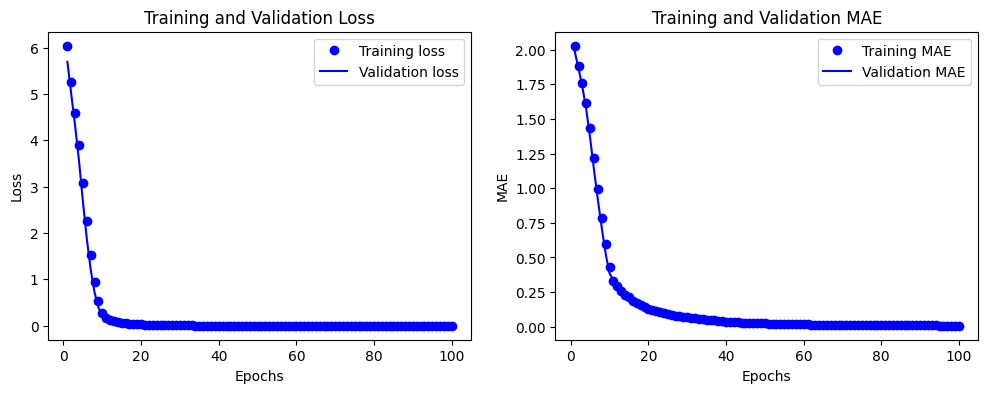

In [ ]:

# Plot the training and validation loss and MAE
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()


Artificial Neural Networks, or ANNs, are a subset of machine learning models that take their cues from the design and operation of biological neural networks seen in the human brain.An input layer, one or more hidden layers, and an output layer are the three layers that make up an artificial neural network (ANN). Each neuron takes in information from the neurons in the layer below and then transforms it to create an output that is sent to the neurons in the layer above. ANNs have been used successfully in a variety of applications, including picture and audio recognition, natural language processing, and predictive modelling in fields such as finance, healthcare, and marketing.The accuracy for ANN algorithm is 73%.

In [ ]:
# Manually enter heart rate and snoring rate
heart_rate = 74.2
snoring_rate = 93.8

# Create a new dataframe with the entered values
new_data = pd.DataFrame({'snoring rate': [snoring_rate],
                         'respiration rate': [25.68],
                         'body temperature': [91.84],
                         'limb movement': [16.6],
                         'blood oxygen': [89.84],
                         'eye movement': [99.6],
                         'sleeping hours': [8],
                         'heart rate': [heart_rate]})

# Use the trained models to predict stress level
logistic_regression_pred = lrr.predict(new_data)
xgb_pred = XGB.predict(new_data)
random_forest_pred = rfm.predict(new_data)

# Print the predicted stress level for each model
print("Predicted stress level using Logistic Regression: ", logistic_regression_pred[0])
print("Predicted stress level using XGB Classifier: ", xgb_pred[0])
print("Predicted stress level using Random Forest Classifier: ", random_forest_pred[0])


Predicted stress level using Logistic Regression:  3
Predicted stress level using XGB Classifier:  4
Predicted stress level using Random Forest Classifier:  0
Predicted stress level using NB:  2


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [ ]:
# Manually enter heart rate and snoring rate
heart_rate = 4
snoring_rate = 10

# Create a new dataframe with the entered values
new_data = pd.DataFrame({'snoring rate': [snoring_rate],
                         'respiration rate': [20],
                         'body temperature': [96],
                         'limb movement': [10],
                         'blood oxygen': [95],
                         'eye movement': [85],
                         'sleeping hours': [6],
                         'heart rate': [heart_rate]})

# Use the trained models to predict stress level
logistic_regression_pred = lrr.predict(new_data)
xgb_pred = XGB.predict(new_data)
random_forest_pred = rfm.predict(new_data)

# Print the predicted stress level for each model
print("Predicted stress level using Logistic Regression: ", logistic_regression_pred[0])
print("Predicted stress level using XGB Classifier: ", xgb_pred[0])
print("Predicted stress level using Random Forest Classifier: ", random_forest_pred[0])


Predicted stress level using Logistic Regression:  3
Predicted stress level using XGB Classifier:  4
Predicted stress level using Random Forest Classifier:  4


In [ ]:
!pip install joblib
import joblib

# Set the path where you want to save your model
model_path = '/content/'
# Save your model as a pickle file
joblib.dump(lrr, model_path + 'Logistic_model.pkl')
joblib.dump(XGB, model_path + 'XGB_model.pkl')
joblib.dump(model_DT, model_path + 'DT_model.pkl')
joblib.dump(rfm, model_path + 'RFM_model.pkl')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['/content/RFM_model.pkl']